# EM ALGORITHM

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

##### DICTIONARY

In [2]:
dictionary = ['Athletics',
 'Archery',
 'Badminton',
 'Baseball',
 'Basketball',
 'Bobsleigh',
 'Bowling',
 'Boxing',
 'Canoeing',
 'Cycling',
 'Climbing',
 'Cricket',
 'Diving',
 'Equestrian',
 'Fencing',
 'Fishing',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hiking',
 'Hockey',
 'Hunting',
 'Judo',
 'Karate',
 'Kayaking',
 'Lacrosse',
 'Motorsports',
 'Paddleboarding',
 'Paintball',
 'Paragliding',
 'Powerlifting',
 'Rafting',
 'Rockclimbing',
 'Rowing',
 'Rugby',
 'Running',
 'Sailing',
 'Shooting',
 'Skateboarding',
 'Skating',
 'Skeetshooting',
 'Skiing',
 'Skydiving',
 'Snowboarding',
 'Soccer',
 'Squash',
 'Surfcasting',
 'Surfing',
 'Swimming',
 'Note',
 'Chord',
 'Harmony',
 'Melody',
 'Rhythm',
 'Beat',
 'Tempo',
 'Pitch',
 'Key',
 'Scale',
 'Interval',
 'Tune',
 'Composition',
 'Song',
 'Lyrics',
 'Instrument',
 'Piano',
 'Guitar',
 'Bass',
 'Drums',
 'Violin',
 'Cello',
 'Trumpet',
 'Saxophone',
 'Clarinet',
 'Flute',
 'Harp',
 'Accordion',
 'Banjo',
 'Mandolin',
 'Ukulele',
 'Harmonica',
 'Synthesizer',
 'Sampler',
 'Mixer',
 'DJ',
 'Producer',
 'Conductor',
 'Singer',
 'Vocalist',
 'Backing Singer',
 'Choir',
 'Ensemble',
 'Band',
 'Soloist',
 'Improvisation',
 'Jazz',
 'Blues',
 'Rock',
 'Pop']

In [3]:
dictionary = [word.lower() for word in dictionary]

In [4]:
dictionary = np.array(dictionary)

In [5]:
dictionary

array(['athletics', 'archery', 'badminton', 'baseball', 'basketball',
       'bobsleigh', 'bowling', 'boxing', 'canoeing', 'cycling',
       'climbing', 'cricket', 'diving', 'equestrian', 'fencing',
       'fishing', 'football', 'golf', 'gymnastics', 'handball', 'hiking',
       'hockey', 'hunting', 'judo', 'karate', 'kayaking', 'lacrosse',
       'motorsports', 'paddleboarding', 'paintball', 'paragliding',
       'powerlifting', 'rafting', 'rockclimbing', 'rowing', 'rugby',
       'running', 'sailing', 'shooting', 'skateboarding', 'skating',
       'skeetshooting', 'skiing', 'skydiving', 'snowboarding', 'soccer',
       'squash', 'surfcasting', 'surfing', 'swimming', 'note', 'chord',
       'harmony', 'melody', 'rhythm', 'beat', 'tempo', 'pitch', 'key',
       'scale', 'interval', 'tune', 'composition', 'song', 'lyrics',
       'instrument', 'piano', 'guitar', 'bass', 'drums', 'violin',
       'cello', 'trumpet', 'saxophone', 'clarinet', 'flute', 'harp',
       'accordion', 'banjo', '

##### MOST PROBABLE WORDS FUNCTION

In [6]:
import numpy as np
import pandas as pd

def most_probable_words(words, probabilities):
    # create a DataFrame from the words and probabilities
    df = pd.DataFrame({'word': words, 'probability': probabilities})
    
    # sort by probability in descending order
    df_sorted = df.sort_values(by='probability', ascending=False)
    
    # get the top 10 words
    top_10_words = df_sorted.head(10)['word'].values
    
    return list(top_10_words)

## RELOADING ORIGINAL DISTRIBUTIONS OVER WORDS

In [7]:
import numpy as np

# Load the data from the CSV file
loaded_data = np.loadtxt("beta_original.csv", delimiter=",")

b_sport = loaded_data[:, 0]  # First column
b_music = loaded_data[:, 1]  # Second column


## RELOADING DTM

In [8]:
import pandas as pd

# Load the CSV data into a DataFrame
short_dtm = pd.read_csv('short_dtm.csv')
# Convert the DataFrame to a matrix if needed
#short_dtm = df.values

# EM

Converged at iteration 2
Beta 1:  [1.77902622e-03 2.80898876e-04 1.21722846e-03 6.36704120e-02
 2.05992509e-03 3.51404494e-01 1.21722846e-03 3.08988764e-03
 4.68164794e-04 1.12359551e-03 1.68539326e-03 3.53932584e-02
 3.74531835e-04 1.21722846e-03 3.74531835e-04 2.80898876e-04
 9.36329588e-05 2.48127341e-02 2.34082397e-03 8.42696629e-04
 4.68164794e-04 1.31086142e-03 1.12359551e-03 2.43445693e-03
 2.52808989e-03 1.02996255e-03 1.59176030e-03 9.36329588e-05
 2.44382022e-02 5.61797753e-04 1.77902622e-03 1.87265918e-04
 9.36329588e-05 1.87265918e-03 3.74531835e-04 2.80898876e-04
 1.87265918e-03 1.31086142e-03 9.36329588e-04 1.87265918e-04
 0.00000000e+00 1.59176030e-03 6.55430712e-04 4.11985019e-03
 7.97752809e-02 1.59176030e-03 9.36329588e-04 3.07116105e-02
 1.12359551e-03 4.68164794e-04 1.21722846e-03 5.61797753e-04
 0.00000000e+00 4.21348315e-03 9.36329588e-05 4.68164794e-04
 2.90262172e-03 5.61797753e-04 3.74531835e-04 6.55430712e-04
 3.74531835e-04 1.02996255e-03 0.00000000e+00 1.217

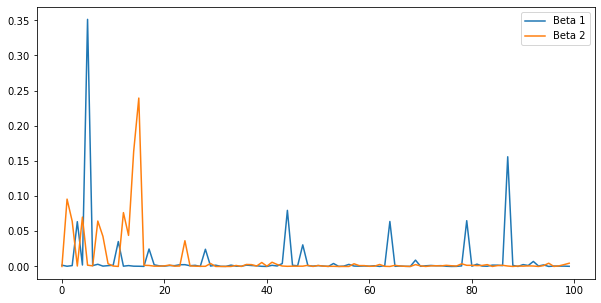

In [9]:
def EM_algorithm(data_matrix, max_iter=300, param_tol=1e-20, likelihood_tol=1e-5, moving_avg_window=50):
    D, V = data_matrix.shape 

    # initialize parameters randomly
    pi = 0.5
    beta = np.random.rand(2, V)
    beta /= np.sum(beta, axis=1)[:, np.newaxis]

    log_likelihoods = []

    # Store initial values to calculate rate of change
    old_pi = pi
    old_beta = beta.copy()
    
    for i in range(max_iter):
        
    # EXPECTATION
        
        # Initializes an empty 2D array p_z with D rows and 2 columns. D represents the number of documents 
        # in the dataset. 
        # p_z will store the probability of each document belonging to each of the two clusters (topics).
        
        p_z = np.zeros((D, 2)) 
        p_z[:, 0] = pi * np.prod(beta[0]**data_matrix, axis=1)
        p_z[:, 1] = (1 - pi) * np.prod(beta[1]**data_matrix, axis=1)
        
                # beta[0] is selecting the first row of the beta matrix, which represents the probabilities 
                # of each word given topic 1. **data_matrix is applying element-wise exponentiation of beta[0] 
                # with each document in the data_matrix. np.prod(..., axis=1) is then calculating the product 
                # of these probabilities along axis=1, which represents the words (the columns of data_matrix). 
                # For each document (each row of data_matrix), it's calculating the product of the 
                # probabilities of the words in that document.
        
        p_z /= np.sum(p_z, axis=1)[:, np.newaxis] # normalize

    # MAXIMIZATION
        
        # Calculating the average of the posterior probabilities of each document belonging to class 1      
        pi = np.mean(p_z[:, 0]) 
        
        for k in range(2):
            for v in range(V): 
                
                # Updates each entry in beta
                # Calculating the sum of the product of the posterior probabilities of each document having 
                # topic k and the count of word v in each document.
                beta[k, v] = np.sum(p_z[:, k] * data_matrix[:, v]) 
            beta[k] /= np.sum(beta[k])  # normalize 
                                        # dividing each entry in the kth row of beta by the sum of that row.


        # Compute log likelihood and add to list
        log_likelihood = np.sum(p_z[:, 0]*np.log(pi * np.prod(beta[0]**data_matrix, axis=1) + 1e-10) +
                                p_z[:, 1]*np.log((1 - pi) * np.prod(beta[1]**data_matrix, axis=1) + 1e-10))
        log_likelihoods.append(log_likelihood)

        # Initialize convergence count
        convergence_count = 0
        
        # Paramater convergence
        param_converged = i > 0 and np.abs(pi - old_pi) < param_tol and np.linalg.norm(beta - old_beta) < param_tol

        # Check for convergence using difference in log likelihoods
        likelihood_converged = i > 0 and np.abs(log_likelihoods[i] - log_likelihoods[i-1]) < likelihood_tol
        
        # If both conditions are satisfied, break the loop
        if param_converged and likelihood_converged:
            print(f'Converged at iteration {i}')
            break

        # Store old values for next iteration
        old_pi = pi
        old_beta = beta.copy()
            
    return pi, beta, log_likelihoods

# Load data
data_matrix = short_dtm

# Convert DataFrame to NumPy array before passing to EM_algorithm
data_matrix_np = data_matrix.to_numpy()

# Run EM
pi, beta, log_likelihoods = EM_algorithm(data_matrix_np)


# Print beta_1, beta_2, and pi_1
print("Beta 1: ", beta[0])
print("Beta 2: ", beta[1])
print("Pi 1: ", pi)

# Plot betas
plt.figure(figsize=(10,5))
plt.plot(beta[0], label='Beta 1')
plt.plot(beta[1], label='Beta 2')
plt.legend()
plt.show()

###### MOST PROBABLE WORDS

In [10]:
most_probable_words(dictionary, beta[0])

['bobsleigh',
 'conductor',
 'snowboarding',
 'mandolin',
 'lyrics',
 'baseball',
 'cricket',
 'surfcasting',
 'golf',
 'paddleboarding']

In [11]:
most_probable_words(dictionary, beta[1])

['fishing',
 'fencing',
 'archery',
 'diving',
 'basketball',
 'boxing',
 'badminton',
 'equestrian',
 'canoeing',
 'karate']